In [10]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt 
import os

In [11]:
OUT_DIR = 'out_bansal'

TEST = ["hello", "row-major", "column-major", "strassen"]
ARCH = ["arm64", "x64", "riscv64"]
SIZES = [8, 16, 32]

EXTRACT_KEYS = {"simSeconds"}

data = defaultdict(dict) # data[test_name][stat_key] = value

for test in TEST:
    for arch in ARCH:
        for size in SIZES:
            test_name = f"{test}_{arch}_{size}_out"
            pathname = os.path.join(OUT_DIR, test_name, "stats.txt")
            with open(pathname) as f:
                for line in f:
                    split_line = [x for x in line.split(" ") if x]
                    if split_line[0] in EXTRACT_KEYS:
                        data[test_name][split_line[0]] = float(split_line[1])

['hello_arm64_8_out', 'hello_x64_8_out', 'hello_riscv64_8_out']
['row-major_arm64_8_out', 'row-major_x64_8_out', 'row-major_riscv64_8_out']
['column-major_arm64_8_out', 'column-major_x64_8_out', 'column-major_riscv64_8_out']
['strassen_arm64_8_out', 'strassen_x64_8_out', 'strassen_riscv64_8_out']
['hello_arm64_16_out', 'hello_x64_16_out', 'hello_riscv64_16_out']
['row-major_arm64_16_out', 'row-major_x64_16_out', 'row-major_riscv64_16_out']
['column-major_arm64_16_out', 'column-major_x64_16_out', 'column-major_riscv64_16_out']
['strassen_arm64_16_out', 'strassen_x64_16_out', 'strassen_riscv64_16_out']
['hello_arm64_32_out', 'hello_x64_32_out', 'hello_riscv64_32_out']
['row-major_arm64_32_out', 'row-major_x64_32_out', 'row-major_riscv64_32_out']
['column-major_arm64_32_out', 'column-major_x64_32_out', 'column-major_riscv64_32_out']
['strassen_arm64_32_out', 'strassen_x64_32_out', 'strassen_riscv64_32_out']


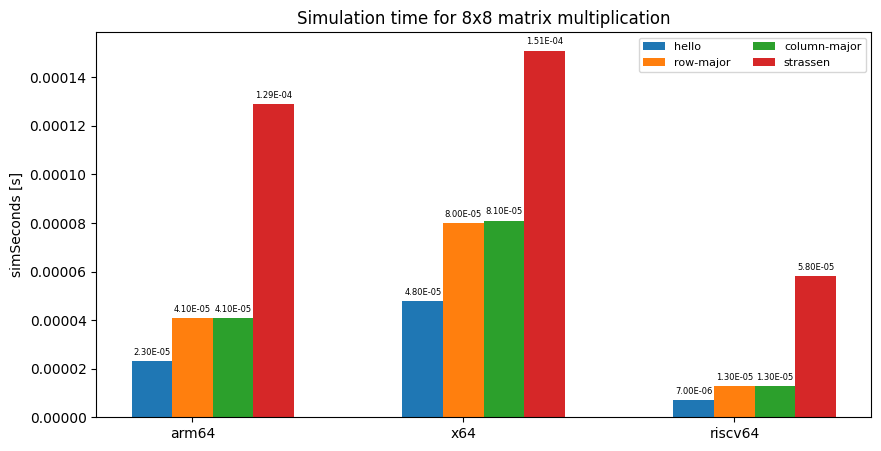

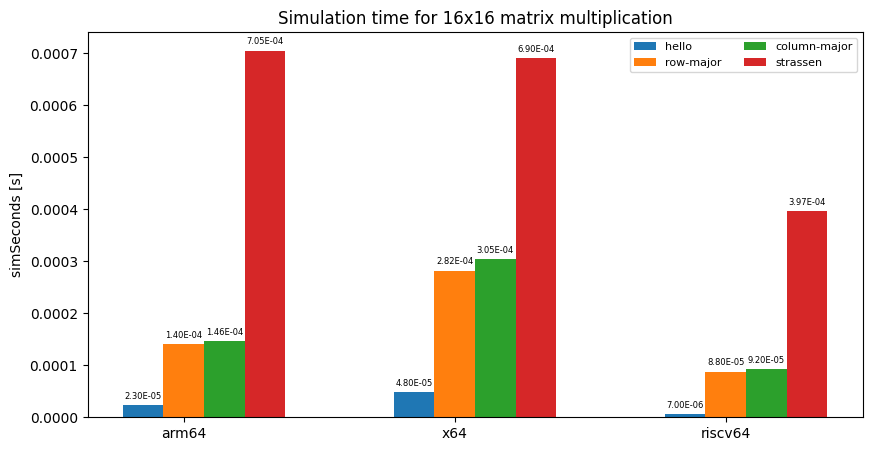

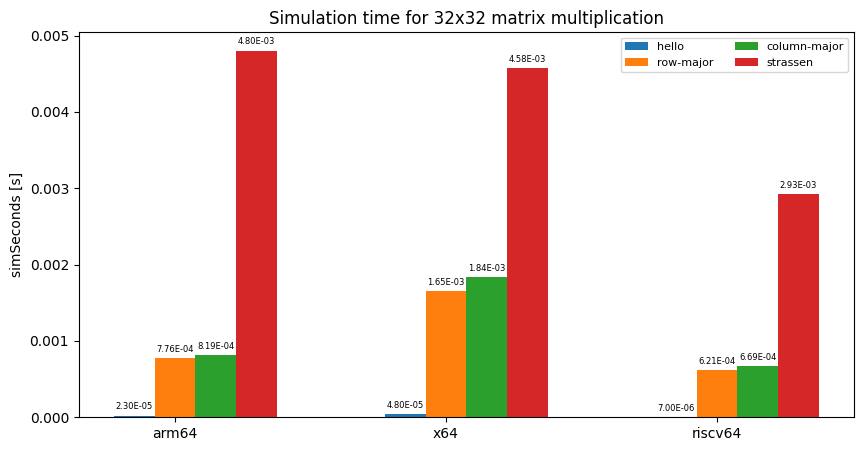

In [45]:
for size in SIZES:
    x = np.arange(len(ARCH))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 5))

    for multiplier, test in enumerate(TEST):
        test_names = [f"{test}_{arch}_{size}_out" for arch in ARCH]
        print(test_names)
        test_data = [data[test_name]["simSeconds"] for test_name in test_names]

        offset = width * multiplier
        rects = ax.bar(x + offset, test_data, width, label=test)
        ax.bar_label(rects, fontsize=6, fmt="%.2E", padding=3)

    ax.set_ylabel("simSeconds [s]")
    ax.set_title(f"Simulation time for {size}x{size} matrix multiplication")
    ax.set_xticks(x + width, ARCH)
    ax.legend(loc="best", fontsize=8, ncols=len(TEST) // 2)

plt.show()